In [289]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)  # sets the max
sns.set_style("whitegrid")

### Creates "all_survery_answers.csv" in data/ ###
# df_mat = pd.read_csv("data/student-mat.csv", sep=";")
# df_mat["course"] = "math"

# df_por = pd.read_csv("data/student-por.csv", sep=";")
# df_por["course"] = "portuguese"

# df_org = pd.concat([df_mat, df_por], ignore_index=True)
###

df_org = pd.read_csv("data/all_survey_answers.csv", index_col=0)

df = pd.read_csv("data/all_students_and_SES.csv")
df_math = df[df["course"] == "math"]
df_port = df[df["course"] == "portuguese"]

In [303]:
print("portuguese")
print(df_port[df_port['G3'] >= 10].shape[0])
print(df_port[df_port['G3'] < 10].shape[0])

print()

print("math")
print(df_math[df_math['G3'] >= 10].shape[0])
print(df_math[df_math['G3'] < 10].shape[0])

portuguese
549
100

math
265
130


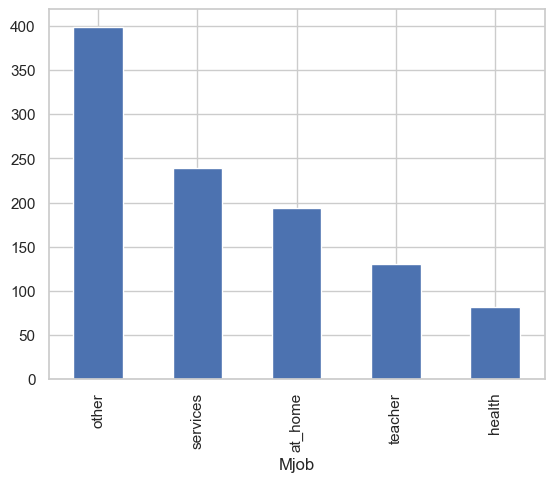

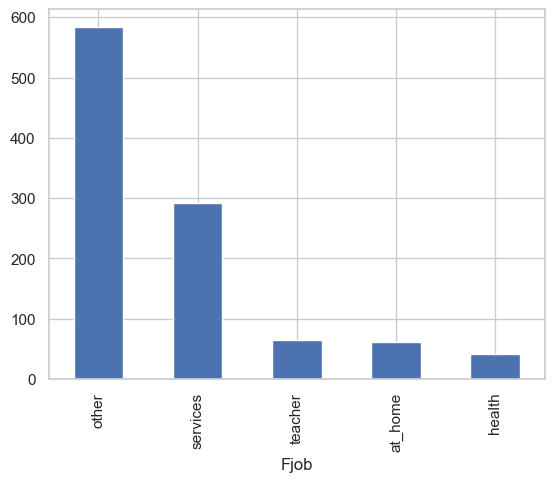

In [306]:
df.Mjob.value_counts().plot(kind="bar")
plt.show()
df.Fjob.value_counts().plot(kind="bar")
plt.show()

# Feature Engineering

# EDA

In [277]:
numeric_features = df_org.select_dtypes("number")
features = df_org .columns

### Correlation Analysis

<Axes: >

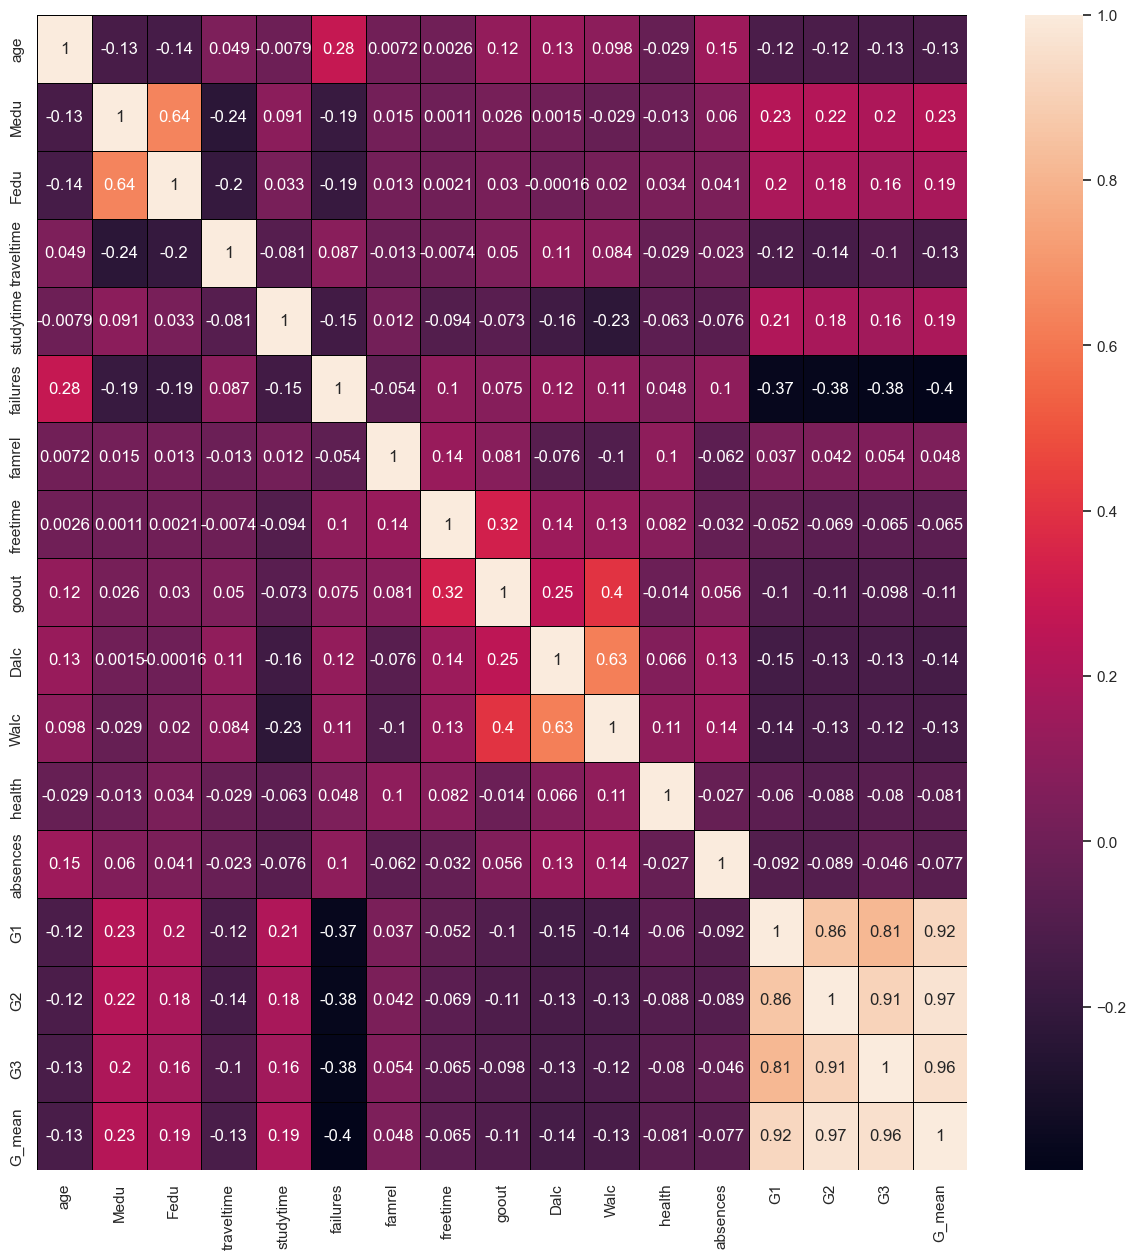

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(
    numeric_features.corr(method="pearson"),
    annot=True,
    cmap="rocket",
    linewidths=0.5,
    linecolor="black",
)

## Sensitive Variables

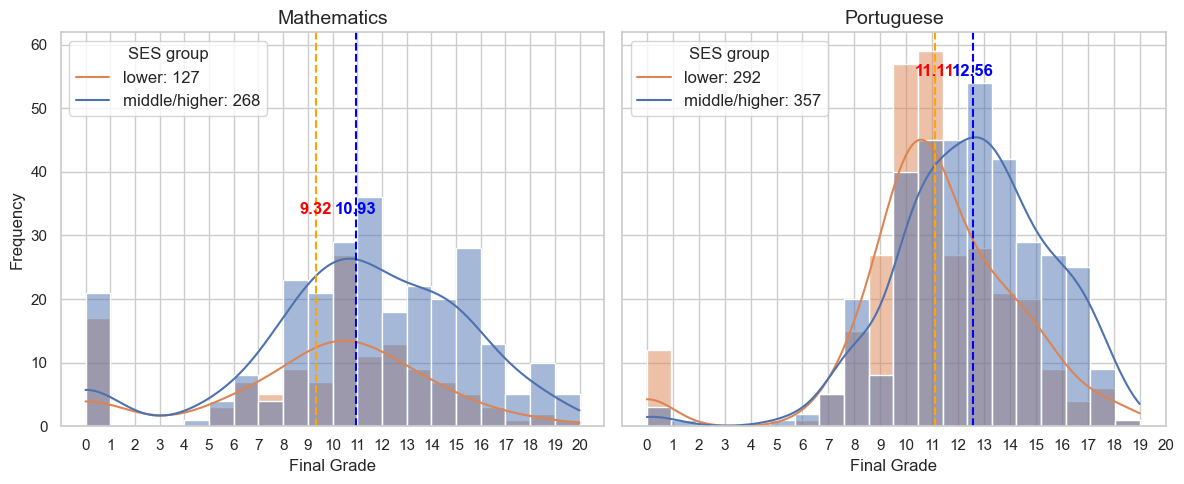

In [279]:
def plot_final_grade_distribution(df: pd.DataFrame):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    title_fontsize = 14
    axis_fontsize = 12
    
    df_math = df[df["course"] == "math"]
    df_port = df[df["course"] == "portuguese"]

    # Get mean final grade for each SES group for both courses
    lower_mean_math, middle_rich_mean_math = df_math.groupby("SES")["G3"].mean()
    lower_mean_port, middle_rich_mean_port = df_port.groupby("SES")["G3"].mean()

    # Create Final grade distribution plot
    n_middle_rich_math, n_lower_math = df_math["SES"].value_counts()
    n_middle_rich_port, n_lower_port = df_port["SES"].value_counts()

    # Math plot
    sns.histplot(x="G3", hue="SES", data=df_math, kde=True, bins=20, ax=ax1)
    ax1.set_title(f"Mathematics", fontsize=title_fontsize)
    ax1.set_xticks(np.arange(0, 21, 1))
    ax1.set_xlabel("Final Grade", fontsize=axis_fontsize)
    ax1.set_ylabel("Frequency", fontsize=axis_fontsize)
    ax1.legend(
        title="SES group",
        loc="upper left",
        labels=[f"lower: {n_lower_math}", f"middle/higher: {n_middle_rich_math}"],
        fontsize=axis_fontsize,
    )

    # mean lines
    ax1.axvline(
        lower_mean_math,
        color="orange",
        linestyle="--",
        label=f"Lower Mean: {lower_mean_math:.2f}",
    )
    ax1.axvline(
        middle_rich_mean_math,
        color="blue",
        linestyle="--",
        label=f"Middle/Higher Mean: {middle_rich_mean_math:.2f}",
    )

    # Display mean values on the lines
    ax1.text(
        lower_mean_math,
        plt.gca().get_ylim()[1] * 0.9,
        f"{lower_mean_math:.2f}",
        color="red",
        ha="center",
        va="center",
        weight="bold",
    )
    ax1.text(
        middle_rich_mean_math,
        plt.gca().get_ylim()[1] * 0.9,
        f"{middle_rich_mean_math:.2f}",
        color="blue",
        ha="center",
        va="center",
        weight="bold",
    )

    # Portugese plot
    sns.histplot(x="G3", hue="SES", data=df_port, kde=True, bins=20, ax=ax2)
    ax2.set_title(f"Portuguese", fontsize=title_fontsize)
    ax2.set_xticks(np.arange(0, 21, 1))
    ax2.set_xlabel("Final Grade", fontsize=axis_fontsize)
    ax2.legend(
        title="SES group",
        loc="upper left",
        labels=[f"lower: {n_lower_port}", f"middle/higher: {n_middle_rich_port}"],
        fontsize=axis_fontsize,
    )

    # mean lines
    ax2.axvline(
        lower_mean_port,
        color="orange",
        linestyle="--",
        label=f"Lower Mean: {lower_mean_port:.2f}",
    )
    ax2.axvline(
        middle_rich_mean_port,
        color="blue",
        linestyle="--",
        label=f"Middle/Higher Mean: {middle_rich_mean_port:.2f}",
    )

    # Display mean values on the lines
    ax2.text(
        lower_mean_port,
        plt.gca().get_ylim()[1] * 0.9,
        f"{lower_mean_port:.2f}",
        color="red",
        ha="center",
        va="center",
        weight="bold",
    )
    ax2.text(
        middle_rich_mean_port,
        plt.gca().get_ylim()[1] * 0.9,
        f"{middle_rich_mean_port:.2f}",
        color="blue",
        ha="center",
        va="center",
        weight="bold",
    )

    plt.savefig(
        f"plots/grade_distribution_by_SES.png",
        dpi=300,
        transparent=True,
        bbox_inches="tight",
    )
    plt.tight_layout()
    plt.show()


plot_final_grade_distribution(df)

## Correlation analysis on SES with non-proxy variables

In [280]:
df_ses = pd.read_csv("data/all_students_and_SES.csv")
corr_dict = {}

unused_cols = ["G1", "G2", "G3", "G_mean", "SES_score", "sex", "age"]  # drop
ses_proxis = [
    "internet",
    "traveltime",
    "address",
    "Medu",
    "Fedu",
    "Mjob",
    "Fjob",
]  # exclude
df_ses = df_ses.drop(columns=unused_cols + ses_proxis)

## MATH
df_math = df_ses[df_ses["course"] == "math"]
df_math = pd.get_dummies(df_math, drop_first=True)

df_corr = pd.DataFrame(
    df_math.corrwith(df_math["SES_middle/rich"], method="pearson"),
    columns=["Mathematics"],
)

## Portuguese
df_port = df_ses[df_ses["course"] == "portuguese"]
df_port = pd.get_dummies(df_port, drop_first=True)
df_corr['Portuguese'] = df_port.corrwith(df_port["SES_middle/rich"], method="pearson")

df_corr = df_corr[:-1] # remove SES_middle/rich
df_corr

# sort values in df_corr by the sum of the absolute values of the correlation
df_corr['absolute_sum'] = df_corr.abs().sum(axis=1)
df_corr = df_corr.sort_values(by='absolute_sum', ascending=False)
df_corr = df_corr[['Mathematics', 'Portuguese']]

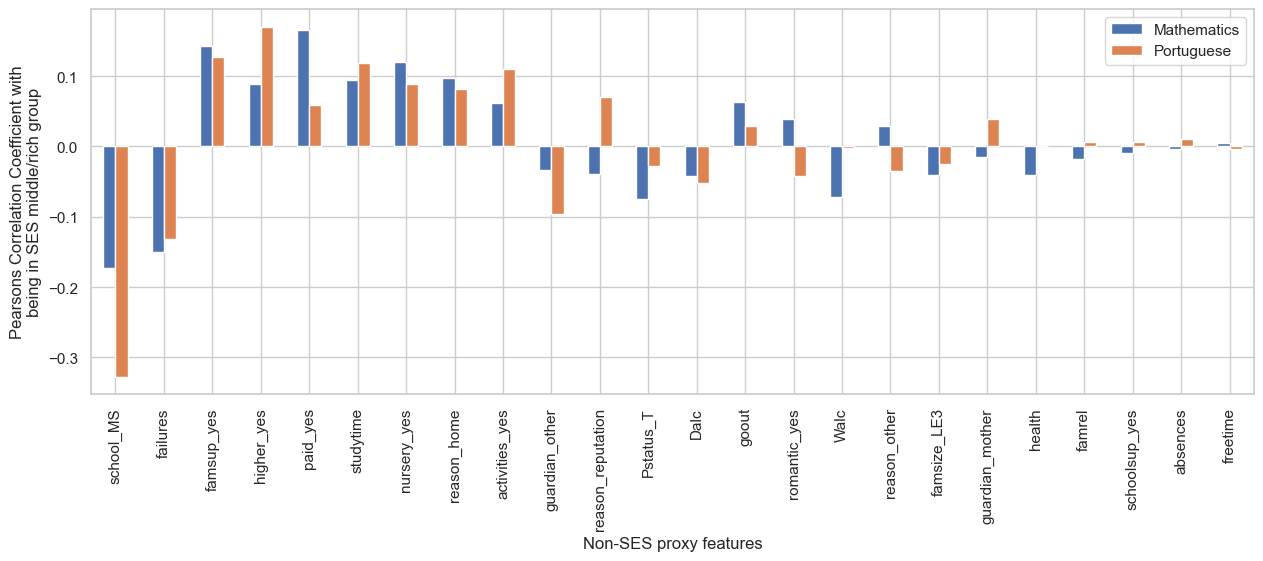

In [281]:
df_corr.plot(kind='bar', figsize=(15, 5))
plt.ylabel("Pearsons Correlation Coefficient with\nbeing in SES middle/rich group")
plt.xlabel("Non-SES proxy features")
plt.savefig(f"plots/SES_corr_with_non_proxy_features_1.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

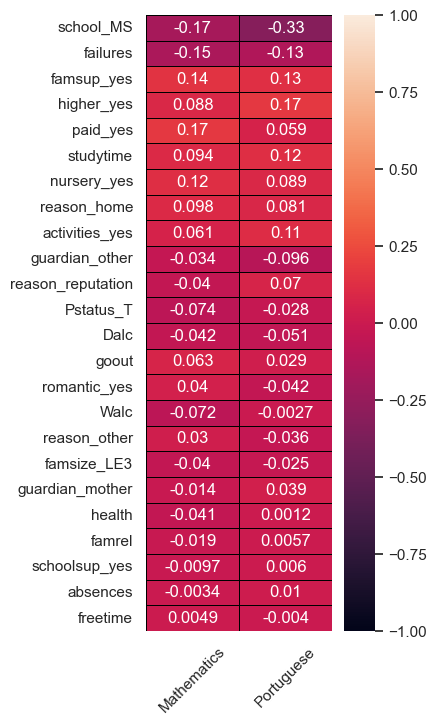

In [282]:
# Plot results
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
sns.heatmap(pd.DataFrame(df_corr), annot=True, vmin=-1, vmax=1, cmap="rocket", linewidths=0.5, linecolor="black", ax=ax)
#ax.set_title("Pearsons Correlation Coefficient with\nSES_middle/rich for non-proxy SES features", fontsize=14)
ax.set_xticks([0.5, 1.5], ["Mathematics", "Portuguese"], rotation=45) # remove xticks
plt.savefig(f"plots/SES_corr_with_non_proxy_features.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()